<a href="https://colab.research.google.com/github/wirriamm/plants-pipeline/blob/master/LSTrAP_Kingdom_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
import re

# To edit: Local paths of input files

In [2]:
# Section 1: Benchmarking annotations
combined_annotation_path = "/content/drive/MyDrive/annotation/combined_annotation3.txt"
coverage_path = "/content/drive/MyDrive/annotation/annotation_coverage.tsv"

# Section 2
evorepro_benchmark_path = "/content/drive/MyDrive/annotation/Graphs and Tables/05-2-f1-stats-evorepro/"
lstrap_benchmark_path = "/content/drive/MyDrive/annotation/Graphs and Tables/05-1-f1-stats/"

# 1. Benchmarking the Annotations

- Accuracy against EVOREPRO annotation
- Coverage of LSTrAP-Kingdom annotations as a percentage of all downloaded samples for each species

## 1.1 Annotation Accuracy


In [3]:
df = pd.read_csv(combined_annotation_path, sep='\t', header=0,
    names=['taxid', 'species', 'runid', 'evorepro', 'po_term', 'matched', 'modified', 'remarks'])
species_to_taxid = {
    'Zea mays': 4577,
    'Oryza sativa': 4530,
    'Solanum lycopersicum': 4081,
    'Arabidopsis thaliana': 3702,
    'Marchantia polymorpha': 3197,
    'Physcomitrella patens': 3218,
    'Picea abies': 3329
}

def accuracy_stats(df, taxid=None):
    if taxid != None:
        df = df[df['taxid'] == taxid]
    raw_tp = df[df['matched']].shape[0]
    false_df = df[df['matched'] == False]
    fp = false_df['modified'].isna().sum()
    curated_tp = false_df['modified'].notna().sum()
    tp = raw_tp + curated_tp
    return (100*tp/(tp+fp)), tp, fp

species_stats = {}
for species, taxid in species_to_taxid.items():
    acc, tp, fp = accuracy_stats(df, taxid)
    species_stats[species] = {'acc': acc,
                              'tp': tp,
                              'fp': fp}
acc, tp, fp = accuracy_stats(df)
total = {'acc': acc,
         'tp': tp,
         'fp': fp}
accs = [species_stats[species]['acc'] for species in species_stats]

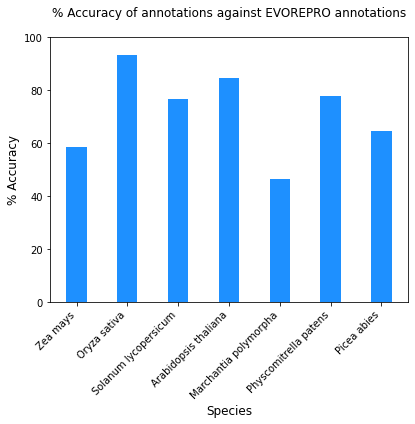

In [4]:
# fig, ax = plt.subplots(figsize=(6,6), dpi=200)
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(species_stats.keys(), accs, width=0.4, color='dodgerblue')
ax.set_title("% Accuracy of annotations against EVOREPRO annotations\n")
ax.set_xlabel("Species", fontsize=12)
plt.draw() # Need to draw to get_xticklabels()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("% Accuracy", fontsize=12)
ax.set_ylim(0,100)
plt.tight_layout()
fig.show()
# plt.savefig("/content/drive/MyDrive/annotation/evorepro_performance.png", dpi=200)

## 1.2 Annotation Coverage

In [5]:
cov_df = pd.read_csv(coverage_path,
            sep='\t', header=0, names=['p_annotated', 'n_annotated', 'n_total'])

taxids = [str(taxid) for taxid in cov_df.index]
s2t = {v: k for k, v in species_to_taxid.items()}
taxids = [str(taxid) for taxid in cov_df.index]
species = [s2t[taxid] for taxid in cov_df.index]

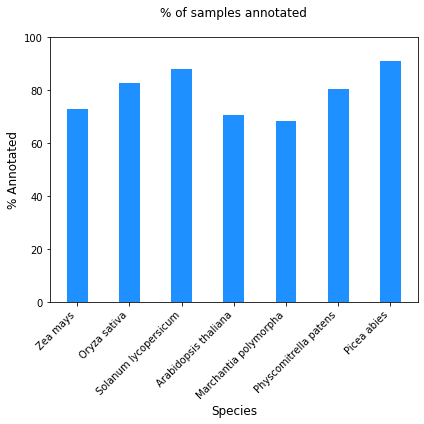

In [6]:
# fig, ax = plt.subplots(figsize=(6,6), dpi=200)
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(species, cov_df['p_annotated'], width=0.4, color='dodgerblue')
ax.set_title("% of samples annotated\n")
ax.set_xlabel("Species", fontsize=12)
plt.draw() # Need to draw to get_xticklabels()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("% Annotated", fontsize=12)
ax.set_ylim(0,100)
plt.tight_layout()
fig.show()
# plt.savefig("/content/drive/MyDrive/annotation/annotation_coverage.png", dpi=200)

## 1.3 Combined barplot

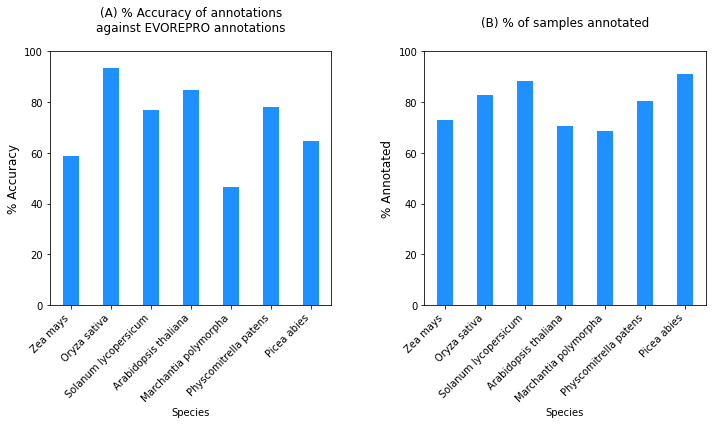

In [7]:
from textwrap import wrap

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6), dpi=200)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
# Accuracy
ax1.bar(species_stats.keys(), accs, width=0.4, color='dodgerblue')
ax1.set_title('\n'.join(wrap("(A) % Accuracy of annotations against EVOREPRO annotations\n", 30)), pad=20)
ax1.set_xlabel("Species", fontsize=10)
plt.draw() # Need to draw to get_xticklabels()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("% Accuracy", fontsize=12)
ax1.set_ylim(0,100)
# Coverage
ax2.bar(species, cov_df['p_annotated'], width=0.4, color='dodgerblue')
ax2.set_title("(B) % of samples annotated\n", pad=10)
ax2.set_xlabel("Species")
plt.draw() # Need to draw to get_xticklabels()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel("% Annotated", fontsize=12)
ax2.set_ylim(0,100)
# both
plt.tight_layout(w_pad=5)
# plt.savefig("/content/drive/MyDrive/annotation/percentages.png", dpi=200)
fig.show()

In [8]:
comb_df = cov_df[['p_annotated']]
comb_df['name'] = comb_df.index.to_series().apply(lambda x: s2t[x])
comb_df['p_accuracy'] = comb_df['name'].apply(lambda x: species_stats[x]['acc'])
# comb_df
acco_plot_df = comb_df.melt('name', ['p_annotated', 'p_accuracy'])
# acco_plot_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


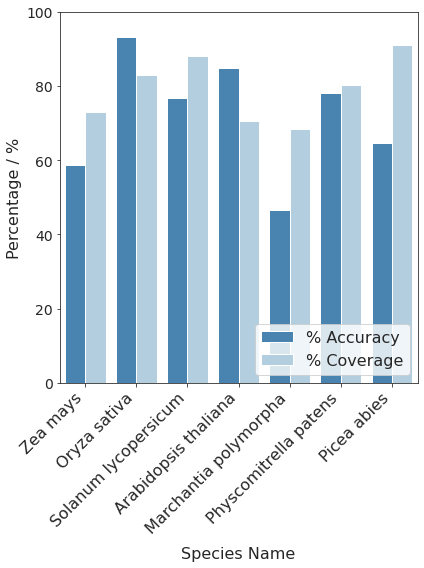

In [9]:
# sns.axes_style('whitegrid')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

# fig, ax = plt.subplots(figsize=(6,8), dpi=200)
fig, ax = plt.subplots(figsize=(6,8))
g = sns.barplot(x='name', y='value', hue='variable', data=acco_plot_df, ax=ax, hue_order=['p_accuracy', 'p_annotated'], palette='Blues_r')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["% Accuracy", "% Coverage"], loc='lower right', fontsize=16)
ax.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
ax.set_xlabel("Species Name", labelpad=10, fontsize=16)
ax.set_ylabel("Percentage / %", fontsize=16)
# ax.set_title("% Accuracy and Coverage of Annotations", pad=20, fontsize=16)
ax.set(ylim=(0,100))
ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/annotation/combined_percentages.png", dpi=200)
plt.show()

# 2. Generating the F1 scores

In [10]:
def get_data(taxid, path):
    df = pd.read_csv(path, sep='\t')
    f1_scores = df['f1'].to_numpy().reshape(9,9)
    f1_scores = f1_scores[::-1]
    pccs = [x/10 for x in range(9,0,-1)]
    pers = [f"{x}%" for x in range(10,100,10)]
    return f1_scores, pccs, pers

def get_best_thresholds(f1_scores, pccs, pers):
    j, k = np.unravel_index(f1_scores.argmax(), f1_scores.shape)
    best_pcc, best_per = pccs[j], pers[k]
    f1_max = round(f1_scores.max(), 4)
    return f1_max, best_pcc, best_per

def plot_heatmap(ax, taxid, f1_scores, pccs, pers):
    # fig, ax = plt.subplots(dpi=200)
    sns.heatmap(f1_scores, ax=ax, cmap="Blues", xticklabels=pers, yticklabels=pccs, 
                    cbar_kws={'label': "F1 scores"}, annot=True, annot_kws={"size":8}, vmin=0, vmax=1)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.set_title(f"taxid{taxid}", fontsize=14, pad=16)
    ax.set_xlabel("% ribosomal neighbors", labelpad=16)
    ax.set_ylabel("PCC cutoff", labelpad=16)
    # Add text box
    j, k = np.unravel_index(f1_scores.argmax(), f1_scores.shape)
    best_pcc, best_per = pccs[j], pers[k]
    f1_max = round(f1_scores.max(), 4)
    ax.text(0.95, 0.1, f"F1: {f1_max}\nNeighbors: {best_per}\nPCC: {best_pcc}", 
            bbox={'facecolor': 'grey', 'alpha':0.5, 'boxstyle':'round,pad=1'},
            fontsize=16, fontstyle='italic', linespacing=2, backgroundcolor=(1,1,1,0.2), 
            ma='left', va='bottom', ha='right',
            transform=ax.transAxes)

In [11]:
# EVOREPRO Benchmarks
dir = evorepro_benchmark_path
paths = os.listdir(dir)
get_taxid = lambda x: re.findall(r"taxid(\d+)", x)[0]
evo_path_dic = {int(get_taxid(path)): dir + path for path in paths}
# evo_path_dic

evo_benchmarks = {}
for taxid, path in evo_path_dic.items():
    f1_scores, pccs, pers = get_data(taxid, path)
    f1_max, best_pcc, best_per = get_best_thresholds(f1_scores, pccs, pers)
    evo_benchmarks[taxid] = f1_max
    # print(f"Taxid: {taxid}")
    # print(f"F1: {f1_max}\nNeighbors: {best_per}\nPCC: {best_pcc}\n")

In [12]:
# LSTrAP-Kingdom Benchmarks
dir = lstrap_benchmark_path
paths = os.listdir(dir)
get_taxid = lambda x: re.findall(r"taxid(\d+)", x)[0]
path_dic = {int(get_taxid(path)): dir + path for path in paths}

benchmarks = {}
for taxid, path in path_dic.items():
    f1_scores, pccs, pers = get_data(taxid, path)
    f1_max, best_pcc, best_per = get_best_thresholds(f1_scores, pccs, pers)
    benchmarks[taxid] = f1_max
    # print(f"Taxid: {taxid}")
    # print(f"F1: {f1_max}\nNeighbors: {best_per}\nPCC: {best_pcc}\n")

## Generating the F1 scores barchart

A comparison between F1 scores of EVOREPRO and that of LSTrAP-Kingdom

In [13]:
lk_df = pd.Series(benchmarks, name='LK').T
evo_df = pd.Series(evo_benchmarks, name='Evo').T - 0.05
comb_df = pd.concat([lk_df, evo_df], axis=1)
comb_df['name'] = comb_df.index.to_series().apply(lambda x: s2t[x])
# comb_df
evo_plot_df = comb_df.melt('name', value_vars=['LK', 'Evo'])
# evo_plot_df

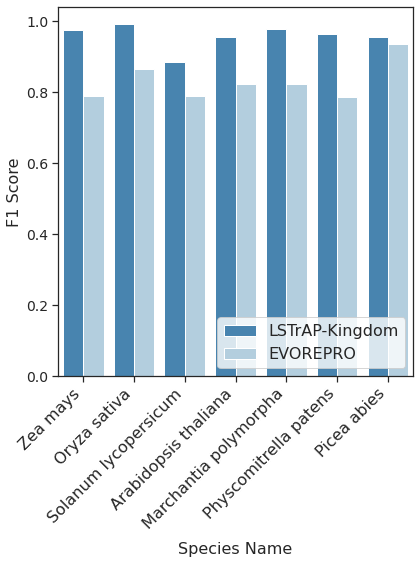

In [14]:
sns.set(style='white')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

to_wrap = lambda text, w: '\n'.join(wrap(text, w))

# fig, ax = plt.subplots(figsize=(6,8), dpi=200)
fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x='name', y='value', hue='variable', data=evo_plot_df, ax=ax, hue_order=['LK', 'Evo'], palette='Blues_r')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["LSTrAP-Kingdom", "EVOREPRO"], loc='lower right', fontsize=16)
ax.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
ax.set_xlabel("Species Name", labelpad=10, fontsize=16)
ax.set_ylabel("F1 Score", fontsize=16)
ax.tick_params(axis="y", labelsize=14)
title = "Benchmark of LSTrAP-Kingdom's F1 Scores against EVOREPRO"
# ax.set_title(to_wrap(title, 35), pad=20, fontsize=16)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/annotation/F1_benchmarks.png", dpi=200)
plt.show()

## 2.2 Heatmaps of F1 scores

For LSTrAP-Kingdom

In [15]:
fig, axs = plt.subplots(4,2, figsize=(20,30), dpi=400)
indexes = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
for i, (taxid, path) in enumerate(path_dic.items()):
    f1_scores, pccs, pers = get_data(taxid, path)
    plot_heatmap(axs[indexes[i]], taxid, f1_scores, pccs, pers)
fig.delaxes(axs[3,1])
plt.tight_layout(h_pad=4)
plt.plot()
# plt.savefig("/content/drive/MyDrive/annotation/Graphs and Tables/f1_heatmaps.png", dpi=400)

[]

For EVOREPRO

In [16]:
fig, axs = plt.subplots(4,2, figsize=(20,30), dpi=400)
indexes = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
for i, (taxid, path) in enumerate(evo_path_dic.items()):
    f1_scores, pccs, pers = get_data(taxid, path)
    plot_heatmap(axs[indexes[i]], taxid, f1_scores, pccs, pers)
fig.delaxes(axs[3,1])
plt.tight_layout(h_pad=4)
plt.plot()
# plt.savefig("/content/drive/MyDrive/annotation/Graphs and Tables/f1_heatmaps_evorepro.png", dpi=400)

[]

# 3. Violin plots for download times

In [17]:
log_path = "/content/drive/MyDrive/annotation/Graphs and Tables/Batch Log.txt"
log_df = pd.read_csv(log_path, sep='\t', skiprows=2, skipfooter=1)
avg_time = log_df['time'].sum()/3600/24
print(f"Average time per sample = {avg_time}")

Average time per sample = 11.104219056682455


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [18]:
time3702_path = "/content/drive/MyDrive/annotation/20201223-231452-taxid3702-runtime.log"
time4577_path = "/content/drive/MyDrive/annotation/20201227-030809-taxid4577-runtime.log"
paths = [time3702_path, time4577_path]
time3702 = pd.read_csv(time3702_path, sep='\t', index_col='runid', skipfooter=1).replace('failed', -1)
time4577 = pd.read_csv(time4577_path, sep='\t', index_col='runid', skipfooter=1).replace('failed', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


In [19]:
def melt_times(path):
    df = pd.read_csv(path, sep='\t', index_col='runid', skipfooter=1).replace('failed', -1)
    df.dropna(axis=0, inplace=True)
    df = df.astype({'ascp_time': int, 'kallisto_time': int})
    df['total_time'] = df['ascp_time'] + df['kallisto_time']
    df = df[df['total_time'] >= 0]
    for col in ['total_time', 'ascp_time', 'kallisto_time']:
        df[col] /= 60
    df = df.melt(value_vars=['ascp_time', 'kallisto_time', 'total_time'])
    return df

dfs = []
for path in paths:
    df = melt_times(path)
    dfs.append(df)

mega_df = pd.concat(dfs, axis=0)

time3702.dropna(axis=0, inplace=True)
time3702 = time3702.astype({'ascp_time': int, 'kallisto_time': int})
time3702['total_time'] = time3702['ascp_time'] + time3702['kallisto_time']
time3702 = time3702[time3702['total_time'] >= 0]
for col in ['total_time', 'ascp_time', 'kallisto_time']:
    time3702[col] /= 60
mega_df = time3702.melt(value_vars=['ascp_time', 'kallisto_time', 'total_time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


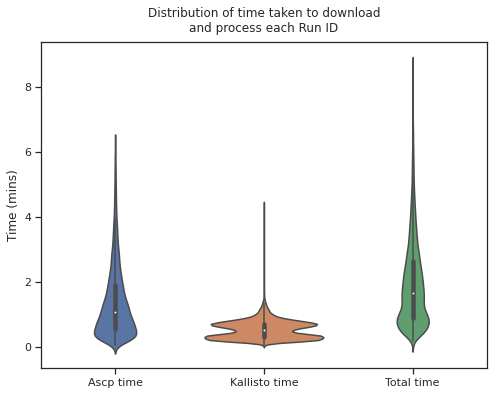

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
# fig, ax = plt.subplots(figsize=(8,6), dpi=200)
sns.violinplot(x='variable', y='value', data=mega_df, ax=ax)
ax.set_xlabel("")
ax.set_xticklabels(['Ascp time', 'Kallisto time', 'Total time'])
ax.set_ylabel("Time (mins)")
title_text = '\n'.join(wrap("Distribution of time taken to download and process each Run ID", 40))
ax.set_title(title_text, pad=10)
# plt.savefig("/content/drive/MyDrive/annotation/violinplot.png", dpi=400)
plt.show()

In [21]:
mean_ascp = mega_df[mega_df['variable'] == 'ascp_time'].mean()
mean_kallisto = mega_df[mega_df['variable'] == 'kallisto_time'].mean()
mean_total = mega_df[mega_df['variable'] == 'total_time'].mean()
print(f"ascp: {mean_ascp.value}\nkallisto: {mean_kallisto.value}\ntotal: {mean_total.value}")

ascp: 1.4053506869124992
kallisto: 0.5489371803918667
total: 1.9542878673043609
